In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

In [3]:
df=pd.read_csv(r'C:\Users\Right-click\OneDrive\سطح المكتب\Black-Friday-Sales-Prediction-main\Black Friday Dataset.csv')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [4]:
df.shape

(550068, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [7]:
df.shape[0]

550068

In [8]:
df.isnull().sum() /df.shape[0]*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

In [9]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

In [10]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

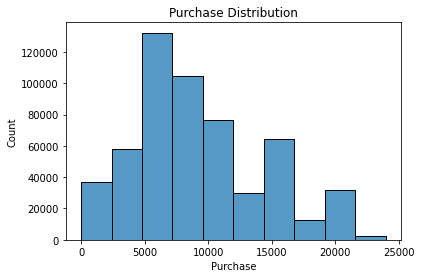

In [11]:
sns.histplot(x=df['Purchase'],data=df,bins=10 ,edgecolor='k')
plt.title('Purchase Distribution')
plt.show()

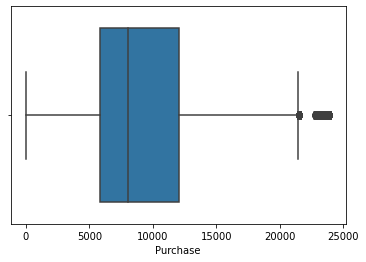

In [12]:
sns.boxplot(x=df['Purchase'],data=df)
plt.show()

In [13]:
df['Gender'].value_counts()

Gender
M    414259
F    135809
Name: count, dtype: int64

In [14]:
df['Gender'].value_counts(normalize=True)*100

Gender
M    75.310507
F    24.689493
Name: proportion, dtype: float64

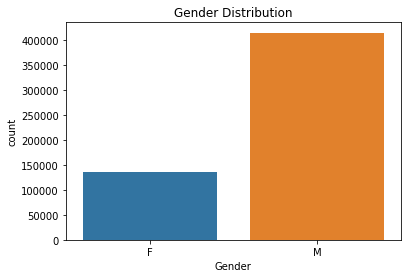

In [15]:
sns.countplot(x=df['Gender'],data=df)
plt.title('Gender Distribution')
plt.show()

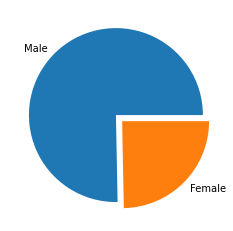

In [16]:
size=df['Gender'].value_counts()
label=['Male','Female']
explode=[0,0.1]
plt.pie(size,labels=label,explode=explode)
plt.show()

In [17]:
df.groupby('Gender')['Purchase'].mean()

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

In [18]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

# Marital_Status

In [19]:
df['Marital_Status'].value_counts(normalize=True)*100

Marital_Status
0    59.034701
1    40.965299
Name: proportion, dtype: float64

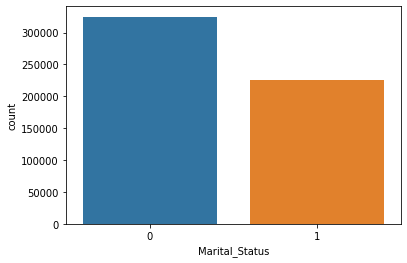

In [20]:
sns.countplot(x=df['Marital_Status'],data=df)
plt.show()

In [21]:
df.groupby('Marital_Status')['Purchase'].mean()

Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

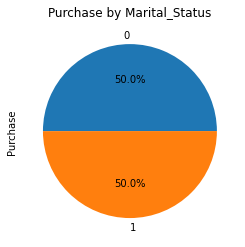

In [22]:
df.groupby('Marital_Status')['Purchase'].mean().plot(kind='pie',autopct='%1.1f%%',title='Purchase by Marital_Status')
plt.show()

In [23]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

Gender
M    414259
F    135809
Name: count, dtype: int64


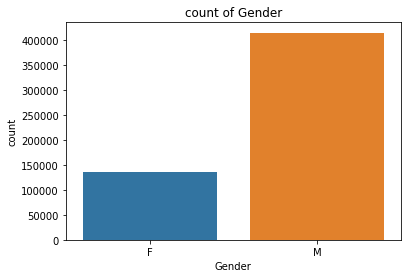

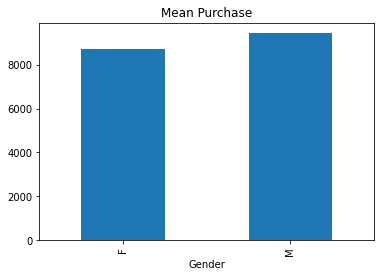

In [24]:
def plot(column_name) :
    print(df[column_name].value_counts())
    sns.countplot(x=column_name,data=df)
    plt.title('count of {}'.format(column_name))
    plt.show()
    mean_purchase=df.groupby(column_name)['Purchase'].mean()
    mean_purchase.plot(kind='bar')
    plt.title('Mean Purchase')
    plt.show()
plot('Gender')

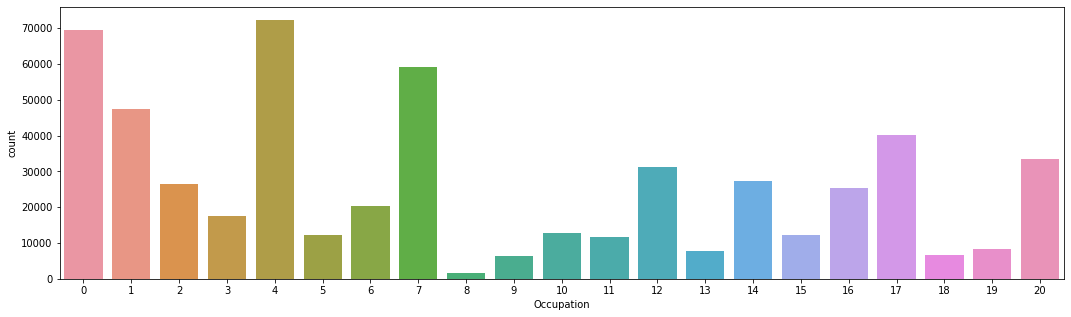

In [25]:
plt.figure(figsize=(18,5))
sns.countplot(x=df['Occupation'])
plt.show()

<Axes: ylabel='Occupation'>

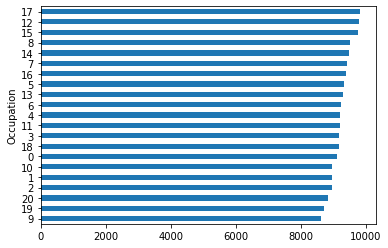

In [26]:
df.groupby('Occupation')['Purchase'].mean().sort_values().plot(kind='barh')


In [27]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

# City_Category

City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64


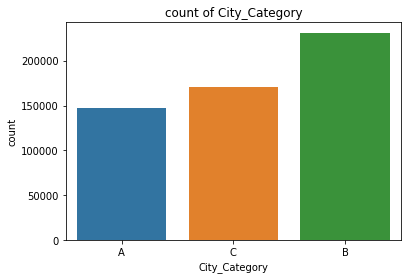

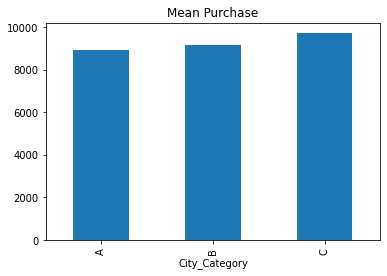

In [28]:
def plot(column_name) :
    print(df[column_name].value_counts())
    sns.countplot(x=column_name,data=df)
    plt.title('count of {}'.format(column_name))
    plt.show()
    mean_purchase=df.groupby(column_name)['Purchase'].mean()
    mean_purchase.plot(kind='bar')
    plt.title('Mean Purchase')
    plt.show()
plot('City_Category')

# Stay_In_Current_City_Years

Stay_In_Current_City_Years
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: count, dtype: int64


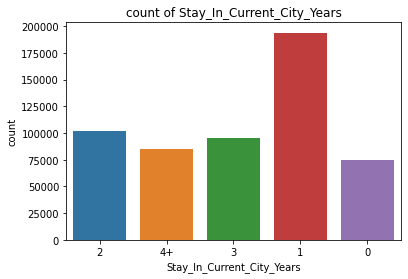

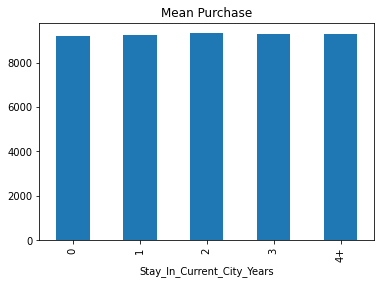

In [29]:
def plot(column_name) :
    print(df[column_name].value_counts())
    sns.countplot(x=column_name,data=df)
    plt.title('count of {}'.format(column_name))
    plt.show()
    mean_purchase=df.groupby(column_name)['Purchase'].mean()
    mean_purchase.plot(kind='bar')
    plt.title('Mean Purchase')
    plt.show()
plot('Stay_In_Current_City_Years')

In [30]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

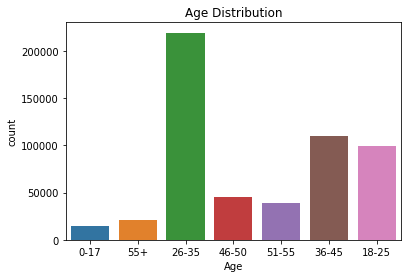

In [31]:
sns.countplot(x=df['Age'],data=df)
plt.title('Age Distribution')
plt.show()

<Axes: xlabel='Age'>

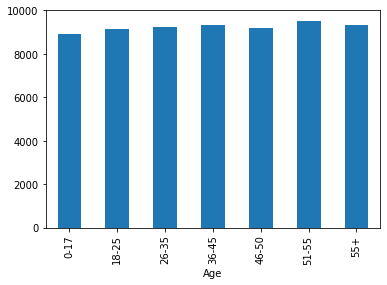

In [32]:
df.groupby('Age')['Purchase'].mean().plot(kind='bar')

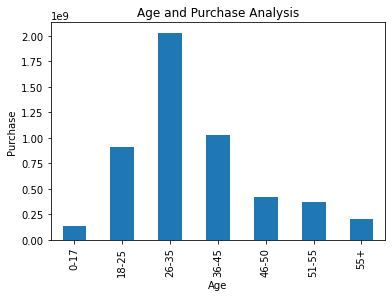

In [33]:
df.groupby('Age')['Purchase'].sum().plot(kind='bar',xlabel='Age',ylabel='Purchase')
plt.title("Age and Purchase Analysis")
plt.show()

# Product_Category_1

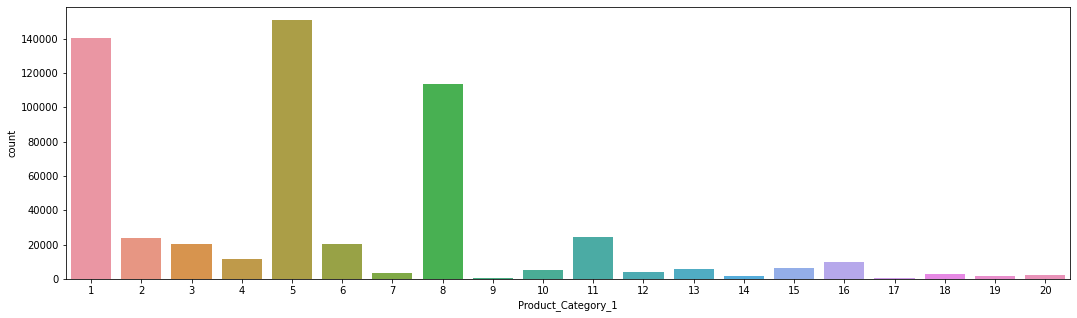

In [34]:
plt.figure(figsize=(18,5))
sns.countplot(x=df['Product_Category_1'])
plt.show()

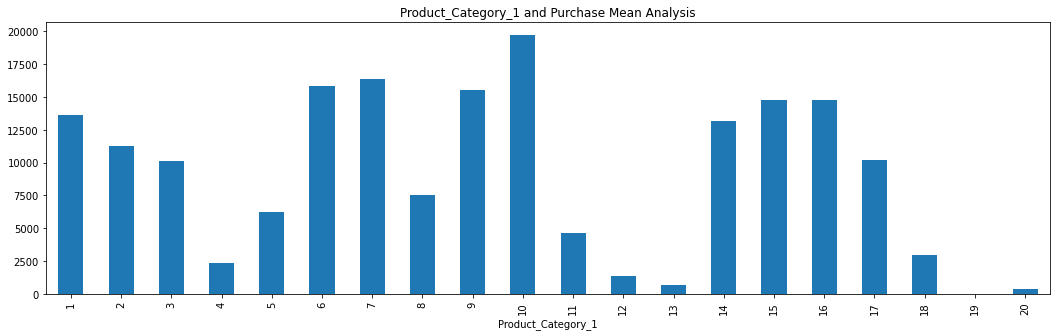

In [35]:
df.groupby('Product_Category_1')['Purchase'].mean().plot(kind='bar',figsize=(18,5))
plt.title("Product_Category_1 and Purchase Mean Analysis")
plt.show()

# Product_Category_2

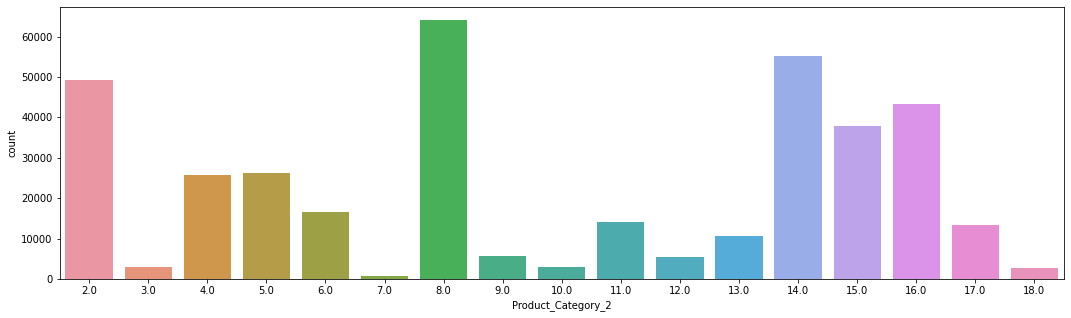

In [36]:
plt.figure(figsize=(18,5))
sns.countplot(x=df['Product_Category_2'])
plt.show()

# Product_Category_3

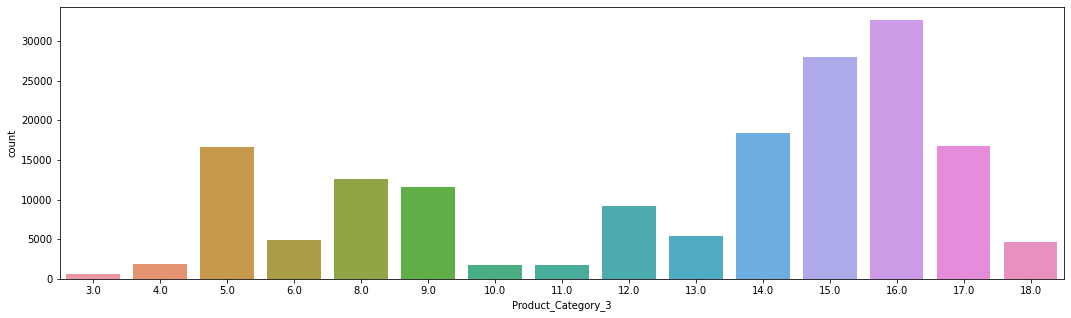

In [37]:
plt.figure(figsize=(18,5))
sns.countplot(x=df['Product_Category_3'])
plt.show()

In [41]:
df_numeric = df.select_dtypes(include=['number']) 
correlation_matrix = df_numeric.corr()
correlation_matrix

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.001529,0.003419,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,-0.000384,0.013263,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,0.015138,0.019473,-0.000463
Product_Category_1,0.003825,-0.007618,0.019888,1.000000,0.540583,0.229678,-0.343703
Product_Category_2,0.001529,-0.000384,0.015138,0.540583,1.000000,0.543649,-0.209918
Product_Category_3,0.003419,0.013263,0.019473,0.229678,0.543649,1.000000,-0.022006
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


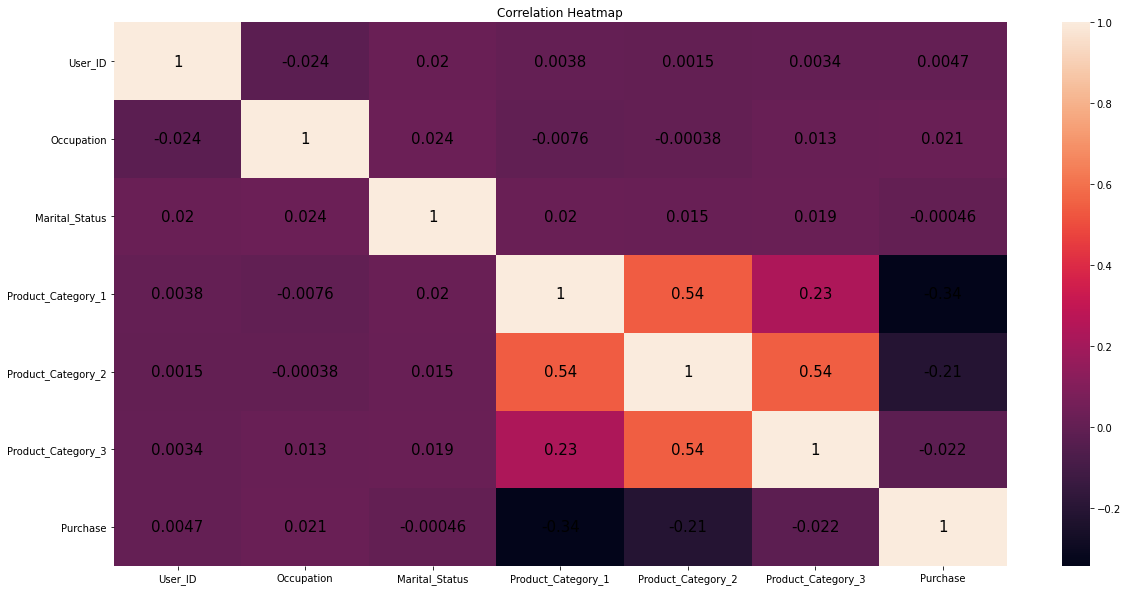

In [43]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_numeric.corr(), annot=True, annot_kws={'color': 'k', 'size': 15})
plt.title("Correlation Heatmap")
plt.show()


In [44]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [45]:
df.drop(columns=['User_ID','Product_ID'],axis=1 ,inplace=True)

In [46]:
df

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...
550063,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,F,55+,1,C,2,0,20,NaN,NaN,365


In [47]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns[df.dtypes=='object']:
    df[i]=le.fit_transform(df[i])
    print(i,df[i].unique())

Gender [0 1]
Age [0 6 2 4 5 3 1]
City_Category [0 2 1]
Stay_In_Current_City_Years [2 4 3 1 0]


In [48]:
df

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,0,2,0,3,NaN,NaN,8370
1,0,0,10,0,2,0,1,6.0,14.0,15200
2,0,0,10,0,2,0,12,NaN,NaN,1422
3,0,0,10,0,2,0,12,14.0,NaN,1057
4,1,6,16,2,4,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1,5,13,1,1,1,20,NaN,NaN,368
550064,0,2,1,2,3,0,20,NaN,NaN,371
550065,0,2,15,1,4,1,20,NaN,NaN,137
550066,0,6,1,2,2,0,20,NaN,NaN,365


In [49]:
df = pd.get_dummies(df, columns=['Stay_In_Current_City_Years'])

In [50]:
df

,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4
0,0,0,10,0,0,3,NaN,NaN,8370,False,False,True,False,False
1,0,0,10,0,0,1,6.0,14.0,15200,False,False,True,False,False
2,0,0,10,0,0,12,NaN,NaN,1422,False,False,True,False,False
3,0,0,10,0,0,12,14.0,NaN,1057,False,False,True,False,False
4,1,6,16,2,0,8,NaN,NaN,7969,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1,5,13,1,1,20,NaN,NaN,368,False,True,False,False,False
550064,0,2,1,2,0,20,NaN,NaN,371,False,False,False,True,False
550065,0,2,15,1,1,20,NaN,NaN,137,False,False,False,False,True
550066,0,6,1,2,0,20,NaN,NaN,365,False,False,True,False,False


In [51]:
df.dtypes

Gender                            int32
Age                               int32
Occupation                        int64
City_Category                     int32
Marital_Status                    int64
Product_Category_1                int64
Product_Category_2              float64
Product_Category_3              float64
Purchase                          int64
Stay_In_Current_City_Years_0       bool
Stay_In_Current_City_Years_1       bool
Stay_In_Current_City_Years_2       bool
Stay_In_Current_City_Years_3       bool
Stay_In_Current_City_Years_4       bool
dtype: object

In [52]:
df.isnull().sum()

Gender                               0
Age                                  0
Occupation                           0
City_Category                        0
Marital_Status                       0
Product_Category_1                   0
Product_Category_2              173638
Product_Category_3              383247
Purchase                             0
Stay_In_Current_City_Years_0         0
Stay_In_Current_City_Years_1         0
Stay_In_Current_City_Years_2         0
Stay_In_Current_City_Years_3         0
Stay_In_Current_City_Years_4         0
dtype: int64

In [53]:
df['Product_Category_2']=df['Product_Category_2'].fillna(0)
df['Product_Category_3']=df['Product_Category_3'].fillna(0)

In [54]:
df.isnull().sum()

Gender                          0
Age                             0
Occupation                      0
City_Category                   0
Marital_Status                  0
Product_Category_1              0
Product_Category_2              0
Product_Category_3              0
Purchase                        0
Stay_In_Current_City_Years_0    0
Stay_In_Current_City_Years_1    0
Stay_In_Current_City_Years_2    0
Stay_In_Current_City_Years_3    0
Stay_In_Current_City_Years_4    0
dtype: int64

In [55]:
X = df.drop('Purchase', axis=1)


In [56]:
X

,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4
0,0,0,10,0,0,3,0.0,0.0,False,False,True,False,False
1,0,0,10,0,0,1,6.0,14.0,False,False,True,False,False
2,0,0,10,0,0,12,0.0,0.0,False,False,True,False,False
3,0,0,10,0,0,12,14.0,0.0,False,False,True,False,False
4,1,6,16,2,0,8,0.0,0.0,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1,5,13,1,1,20,0.0,0.0,False,True,False,False,False
550064,0,2,1,2,0,20,0.0,0.0,False,False,False,True,False
550065,0,2,15,1,1,20,0.0,0.0,False,False,False,False,True
550066,0,6,1,2,0,20,0.0,0.0,False,False,True,False,False


In [57]:
y=df['Purchase']
y

0          8370
1         15200
2          1422
3          1057
4          7969
          ...  
550063      368
550064      371
550065      137
550066      365
550067      490
Name: Purchase, Length: 550068, dtype: int64

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

# Decision Tree

In [59]:
from sklearn.tree import DecisionTreeRegressor
DT=DecisionTreeRegressor(random_state=42)

In [60]:
DT.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [61]:
y_pred=DT.predict(X_test)

In [62]:
y_pred

array([15688.5       ,  1574.25      , 12462.        , ...,
       12170.5       ,  8293.33333333,  6732.1       ])

In [63]:
from sklearn.metrics import r2_score

In [64]:
r2_score(y_test, y_pred)

0.5562547212337208

# Random Forest Regressor

In [65]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor(random_state=42, n_estimators=100)

In [66]:
RF.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [67]:
y_predRF=RF.predict(X_test)
y_predRF

array([15756.30575   ,  1254.71709921, 14876.03583333, ...,
       12203.88230952,  8236.30362929,  6786.5381356 ])

In [68]:
r2_score(y_test, y_predRF)

0.6332728139616001